#### Import necessary libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd

#### Open and save each excel's sheet into a  pandas dataframe

In [84]:
sheets = ['HECHOS','VICTIMAS']

# Open the excel file
excel_file = pd.ExcelFile('data\lesiones.xlsx')

# Empty dict dor dataframe storing
dfs = {}

# Iterate through each sheet
for sheet_name in sheets:
    # save each sheet into a DataFrame
    df = excel_file.parse(sheet_name)
    
    # Store the DataFrame in the dict with the sheet name as the key
    dfs[sheet_name] = df

hechos = dfs['HECHOS']
victimas = dfs['VICTIMAS']

In [4]:
homicidios_hechos = pd.read_excel('data\homicidios.xlsx',sheet_name='HECHOS')
homicidios_victimas = pd.read_excel('data\homicidios.xlsx',sheet_name='VICTIMAS')

In [4]:
municipios = gpd.read_file("data\municipio.json" )

## Exploring the columns and keeping relevant columns in hechos dataframe

In [6]:
homicidios_hechos.head(2)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS


In [7]:
homicidios_hechos.columns # drop 'Altura', 'Cruce', 'Direccion Normalizada', 'XY (CABA)'

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO'],
      dtype='object')

In [8]:
homicidios_victimas.head(2)

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00


In [85]:
hechos.head(2)  # 23785 rows × 27 columns

,id,n_victimas,aaaa,mm,dd,fecha,hora,franja_hora,direccion_normalizada,comuna,...,latutid,victima,acusado,participantes,moto,auto,transporte_publico,camion,ciclista,gravedad
0,LC-2019-0000179,1,2019,1,1,2019-01-01 00:00:00,09:00:00,9,SD,14,...,-34.559658,CICLISTA,SD,CICLISTA-SD,SD,SD,SD,SD,x,SD
1,LC-2019-0000053,1,2019,1,1,2019-01-01 00:00:00,01:55:00,1,SD,8,...,-34.669125,AUTO,SD,AUTO-SD,SD,x,SD,SD,SD,SD


In [10]:
hechos.columns #drop  otra_direccion, direccion_normalizada, calle, altura, cruce, geocodificacion_CABA, 'moto', 'auto', 'transporte_publico', 'camion', 'ciclista' 

Index(['id', 'n_victimas', 'aaaa', 'mm', 'dd', 'fecha', 'hora', 'franja_hora',
       'direccion_normalizada', 'comuna', 'tipo_calle', 'otra_direccion',
       'calle', 'altura', 'cruce', 'geocodificacion_CABA', 'longitud',
       'latutid', 'victima', 'acusado', 'participantes', 'moto', 'auto',
       'transporte_publico', 'camion', 'ciclista', 'gravedad'],
      dtype='object')

#### Dropping unncesesary columns to the analysis

In [86]:
hechos.drop(columns=[ 'otra_direccion', 'direccion_normalizada', 'calle', 'altura', 'cruce', 'geocodificacion_CABA', 'participantes', 'moto', 'auto',
       'transporte_publico', 'camion', 'ciclista'], inplace = True)
hechos.rename( columns={'latutid':'latitud'}, inplace= True)

In [87]:

hechos.head(2)

,id,n_victimas,aaaa,mm,dd,fecha,hora,franja_hora,comuna,tipo_calle,longitud,latitud,victima,acusado,gravedad
0,LC-2019-0000179,1,2019,1,1,2019-01-01 00:00:00,09:00:00,9,14,SD,-58.408911,-34.559658,CICLISTA,SD,SD
1,LC-2019-0000053,1,2019,1,1,2019-01-01 00:00:00,01:55:00,1,8,SD,-58.44351,-34.669125,AUTO,SD,SD


In [13]:
homicidios_hechos.drop( columns= ['Altura', 'Cruce', 'Dirección Normalizada', 'XY (CABA)'], inplace= True)
homicidios_hechos.head(2)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,COMUNA,pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,8,-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",9,-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS


In [14]:
homicidios_hechos.rename( columns={'pos x':'longitud', 'pos y':'latitud'}, inplace=True)

### Well, now we hace all necesary dataframes, the merge between HECHOS and VICTIMAS from both homicidios y lesiones will be perform in power bi.

In [15]:
# helps by counting the number of unique values in each column
def unique_count_per_column(df):
    unique_counts = df.nunique()
    return unique_counts

In [16]:
unique_count_per_column(hechos) # id column has unique values, there is no duplicates

id             23785
n_victimas        11
aaaa               3
mm                12
dd                31
fecha           1097
hora            2043
franja_hora       25
comuna            17
longitud       13810
latitud        13757
victima           14
acusado           14
gravedad           5
dtype: int64

In [17]:
unique_count_per_column(homicidios_hechos)

ID                 696
N_VICTIMAS           3
FECHA              598
AAAA                 6
MM                  12
DD                  31
HORA               375
HH                  25
LUGAR_DEL_HECHO    683
TIPO_DE_CALLE        4
Calle              279
COMUNA              16
longitud           605
latitud            605
PARTICIPANTES       41
VICTIMA             10
ACUSADO             10
dtype: int64

In [18]:
homicidios_hechos.HH.unique() # Needs to be replaced 'SD' to 99 for easy data type handling

array([4, 1, 7, 0, 5, 18, 19, 15, 11, 22, 16, 9, 23, 6, 10, 17, 12, 8, 20,
       21, 14, 3, 2, 13, 'SD'], dtype=object)

In [19]:
homicidios_hechos.HH = homicidios_hechos.HH.replace('SD', 99)

In [20]:
# Extract the time portion from datetime values and keep all time values
homicidios_hechos['HORA'] = pd.to_datetime(homicidios_hechos['HORA'], errors='coerce').dt.time

# Filter rows where 'HORA' is not null
filtered_values = homicidios_hechos[homicidios_hechos['HORA'].notnull()]


In [88]:
hechos.n_victimas.unique() # All seems normal except for the 0, which might be an outlier. We'll see later.

array([ 1,  4,  2,  3,  5, 10,  6, 16,  8,  0,  7], dtype=int64)

#### from this unique count we can see that: year, month, day have the espected values. It can be cheacked by:

In [22]:
hechos.aaaa.unique()
hechos.mm.unique()
hechos.dd.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

Converting to time the hora column ignoring the 'SD' values

In [89]:
hechos['hora'] = pd.to_datetime(hechos['hora'], format='%H:%M:%S', errors = 'coerce').dt.time

Converting to datetime the 'fecha' column

In [90]:
hechos.fecha = hechos.fecha.apply(pd.to_datetime) 

In [25]:
homicidios_hechos.FECHA = homicidios_hechos.FECHA.apply(pd.to_datetime)

Replace nan, 'sd', and 'No Especificada' with 'SD' in ['franja_hora', 'comuna']      

In [26]:
hechos.franja_hora.unique()

array([9, 1, 2, 4, 8, 7, 12, 13, 19, 18, 21, 3, 15, 14, 5, 17, 23, 10, 16,
       11, 20, 22, 0, 6, 'sd', nan], dtype=object)

In [93]:
hechos.comuna.unique()

array([14, 8, 7, 3, 15, 11, 9, 1, 4, 12, 2, 5, 6, 13, 10, 'SD'],
      dtype=object)

In [91]:
hechos.franja_hora = hechos.franja_hora.replace(['sd'], np.nan)

In [92]:
hechos.comuna = hechos.comuna.replace(['SD', 'sd', 'No Especificada', np.nan], 'SD')

#### Standarising the geolocation columns

In [30]:
homicidios_hechos[homicidios_hechos.latitud == '.' ]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,COMUNA,longitud,latitud,PARTICIPANTES,VICTIMA,ACUSADO
38,2016-0052,1,2016-04-20,2016,4,20,NaT,20,AUTOPISTA LUGONES PK 10000,AUTOPISTA,"LUGONES, LEOPOLDO AV.",13,.,.,MOTO-SD,MOTO,SD
106,2016-0136,1,2016-10-25,2016,10,25,NaT,0,AU BUENOS AIRES - LA PLATA KM. 4,AUTOPISTA,AUTOPISTA BUENOS AIRES - LA PLATA,4,.,.,MOTO-CARGAS,MOTO,CARGAS
119,2016-0151,1,2016-11-18,2016,11,18,NaT,20,SD,CALLE,NaN,0,.,.,PEATON-SD,PEATON,SD
139,2016-0174,1,2016-12-27,2016,12,27,NaT,0,AUTOPISTA 25 DE MAYO,AUTOPISTA,AUTOPISTA 25 DE MAYO,0,.,.,SD-SD,SD,SD
176,2017-0042,1,2017-04-10,2017,4,10,NaT,9,AV. LEOPOLDO LUGONES PKM 6900,GRAL PAZ,"LUGONES, LEOPOLDO AV.",14,.,.,MOTO-CARGAS,MOTO,CARGAS
180,2017-0050,2,2017-04-28,2017,4,28,NaT,11,AU PERITO MORENO Y RAMAL ENLACE AU1/AU6,AUTOPISTA,AUTOPISTA PERITO MORENO,9,.,.,MOTO-CARGAS,MOTO,CARGAS
181,2017-0051,1,2017-05-01,2017,5,1,NaT,3,AU DELLEPIANE 2400,AUTOPISTA,AUTOPISTA DELLEPIANE LUIS TTE. GRAL.,7,.,.,AUTO-AUTO,AUTO,AUTO
256,2017-0140,1,2017-11-19,2017,11,19,NaT,23,AU ARTURO FRONDIZI PKM 3100,AUTOPISTA,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,4,.,.,MOTO-PASAJEROS,MOTO,PASAJEROS
313,2018-0039,1,2018-04-21,2018,4,21,NaT,22,AUTOPISTA LUGONES KM 4.7,AUTOPISTA,"LUGONES, LEOPOLDO AV.",14,.,.,PEATON-AUTO,PEATON,AUTO
546,2020-0026,1,2020-05-17,2020,5,17,NaT,6,"LUGONES, LEOPOLDO AV. KM 6,1",AUTOPISTA,"LUGONES, LEOPOLDO AV.",14,.,.,MOTO-OBJETO FIJO,MOTO,OBJETO FIJO


In [31]:
homicidios_hechos.latitud = homicidios_hechos.latitud.replace('.', 0)
homicidios_hechos.longitud = homicidios_hechos.longitud.replace('.', 0)
homicidios_hechos.latitud = homicidios_hechos.latitud.astype(float)
homicidios_hechos.longitud = homicidios_hechos.longitud.astype(float)

In [95]:
# Define the regex pattern to match '-58' without a dot
pattern = r'(-58)(?![.])'

# Add a dot after '-58' using str.replace() and regex
hechos.longitud = hechos.longitud.str.replace(pattern, r'\1.')

C:\Users\Borrarxxx\AppData\Local\Temp\ipykernel_9692\4017112831.py:5: FutureWarning:

The default value of regex will change from True to False in a future version.



In [96]:
hechos.longitud.unique()

array(['-58.408911', '-58.44351', '-58.468335', ..., '-58.432885960226',
       '-58.488326609395', '-58.382894'], dtype=object)

In [97]:
result_list = [value for value in hechos.longitud if not str(value).startswith('-58.')]
result_list = set(result_list)
result_list

{'SD', nan}

In [104]:
# Define the regex pattern to match '-58' without a dot
pattern = r'(-34)(?![.])'

# Add a dot after '-58' 
hechos.latitud = hechos.latitud.str.replace(pattern, r'\1.')

C:\Users\Borrarxxx\AppData\Local\Temp\ipykernel_9692\2355825015.py:5: FutureWarning:

The default value of regex will change from True to False in a future version.



In [105]:
hechos.latitud.unique()

array(['-34.559658', '-34.669125', '-34.677556', ..., '-34.619702288565',
       '-34.641753304864', '-34.583083'], dtype=object)

In [106]:
result_list_latitud = [value for value in hechos.latitud if not str(value).startswith('-58.')]
result_list_latitud = set(result_list)
result_list_latitud

{'SD', nan}

The 'SD' values in longitud and latutid columns will be replaced with nan values. For datatype reasons, this column contains floats.

In [107]:
hechos.latitud = hechos.latitud.replace('SD', np.nan)
hechos.longitud = hechos.longitud.replace('SD', np.nan)

In [40]:
hechos.victima.unique()

array(['CICLISTA', 'AUTO', 'SD', 'PEATON', 'MOTO', 'TRANSPORTE PUBLICO',
       'CAMIONETA', 'MOVIL', 'OTRO', 'CAMION', 'MONOPATIN', 'UTILITARIO',
       'TAXI', 'MIXTO'], dtype=object)

In [41]:
hechos.acusado.unique()

array(['SD', 'AUTO', 'CICLISTA', 'MOVIL', 'CAMIONETA', 'MOTO', 'TAXI',
       'TRANSPORTE PUBLICO', 'CAMION', 'OBJETO FIJO', 'OTRO',
       'UTILITARIO', 'PEATON', 'MONOPATIN'], dtype=object)

In [42]:
hechos.gravedad.unique()

array(['SD', 'GRAVE', 'sd', 'FATAL', 'grave'], dtype=object)

'gravedad' to uppercase only

In [108]:
hechos.gravedad = hechos.gravedad.str.upper()

Filtering the municipio json file to fit CABA

In [44]:
comunas = municipios[municipios['nam'].str.contains('Comuna \d+')]

C:\Users\Borrarxxx\AppData\Local\Temp\ipykernel_9692\4255766499.py:29: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  comunas['centroid'] = comunas['geometry'].centroid


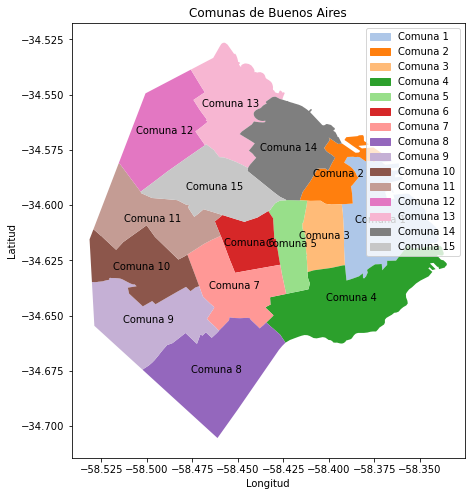

In [45]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

comunas = municipios[municipios['nam'].str.contains('Comuna \d+')]
comunas = comunas.to_crs("EPSG:4326")

# Define colors for each Comuna
comunas_color = {
    f'Comuna {i}': plt.cm.tab20(i) for i in range(1, 16)
}

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))
legend_handles = []

# Plot each Comuna with its respective color
for comuna, color in comunas_color.items():
    patch = Patch(color=color, label=comuna)
    legend_handles.append(patch)
    comunas[comunas['nam'] == comuna].plot(ax=ax, color=color)

# Configure the plot
ax.set_title("Comunas de Buenos Aires")
ax.set_xlabel("Longitud")
ax.set_ylabel("Latitud")

# Calculate centroids and label points
comunas['centroid'] = comunas['geometry'].centroid
for x, y, label in zip(comunas['centroid'].x, comunas['centroid'].y, comunas['nam']):
    ax.text(x, y, label, fontsize=10, ha='center', va='center')

# Show the legend
ax.legend(handles=legend_handles)

# Show the plot
plt.show()


In [46]:
comunas

,gid,fna,gna,nam,in1,fdc,sag,geometry,centroid
68,1698,Comuna 13,Comuna,Comuna 13,022091,Direc. de Catastro,IGN,"MULTIPOLYGON (((-58.45535 -34.52776, -58.45404...",POINT (-58.45396 -34.55418)
69,1705,Comuna 1,Comuna,Comuna 1,022007,Direc. de Catastro,IGN,"MULTIPOLYGON (((-58.38609 -34.57823, -58.38592...",POINT (-58.37151 -34.60644)
1725,1703,Comuna 3,Comuna,Comuna 3,022021,Direc. de Catastro,IGN,"MULTIPOLYGON (((-58.41026 -34.59811, -58.40939...",POINT (-58.40265 -34.61384)
1735,1694,Comuna 7,Comuna,Comuna 7,022049,Direc. de Catastro,IGN,"MULTIPOLYGON (((-58.45900 -34.61475, -58.45846...",POINT (-58.45189 -34.63655)
1742,1695,Comuna 10,Comuna,Comuna 10,022070,Direc. de Catastro,IGN,"MULTIPOLYGON (((-58.48830 -34.62018, -58.48817...",POINT (-58.50281 -34.62784)
1749,1696,Comuna 11,Comuna,Comuna 11,022077,Direc. de Catastro,IGN,"MULTIPOLYGON (((-58.49835 -34.59639, -58.49714...",POINT (-58.49684 -34.60610)
1757,1697,Comuna 15,Comuna,Comuna 15,022105,Direc. de Catastro,IGN,"MULTIPOLYGON (((-58.46600 -34.57335, -58.46496...",POINT (-58.46277 -34.59188)
1758,1699,Comuna 14,Comuna,Comuna 14,022098,Direc. de Catastro,IGN,"MULTIPOLYGON (((-58.42673 -34.55204, -58.42672...",POINT (-58.42229 -34.57387)
1768,1700,Comuna 2,Comuna,Comuna 2,022014,Direc. de Catastro,IGN,"MULTIPOLYGON (((-58.38359 -34.57339, -58.38180...",POINT (-58.39490 -34.58579)
1770,1701,Comuna 8,Comuna,Comuna 8,022056,Direc. de Catastro,IGN,"MULTIPOLYGON (((-58.44910 -34.65118, -58.44879...",POINT (-58.46187 -34.67452)


In [1]:
comunas=comunas[['geometry','nam']]
comunas.rename(columns={'nam':'COMUNA'}, inplace=True)

comunas['COMUNA'] = comunas['COMUNA'].str.replace('Comuna', '').str.strip()

# Creamos un GeoDataFrame
gdf = gpd.GeoDataFrame(comunas, geometry='geometry')

# Guardamos el GeoDataFrame como GeoJSON
gdf.to_file('data\comunass.json', driver='GeoJSON')

NameError: name 'comunas' is not defined

In [47]:
# sanving it for the coroplet power bi map
comunas.to_csv('data/mapa_comunas.csv', index=False)

### Finding outliers

I chose the IQR (Interquartile Range) method because certain columns contains values such as 'SD,' which is a extremely large value in some cases. While this value may not necessarily be an outlier, their presence can significantly skew the calculation of outliers if I had opted for the standard deviation method. In contrast, the IQR method is less susceptible to the influence of extreme outliers, making it a more robust choice for identifying and handling outliers in the data.

In [48]:
def find_outliers(df, column_name):
    conteo = df[column_name].value_counts().to_dict()
    
    # Calculate the quartiles and IQR based on counts
    counts = list(conteo.values())
    q1, q3 = np.percentile(counts, [25, 75])
    iqr = q3 - q1
    
    # Calculate the lower and upper bounds
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Find outliers based on counts
    outliers = {key: value for key, value in conteo.items() if value < lower_bound or value > upper_bound}

    return lower_bound, upper_bound, outliers

In [49]:
lower_bound, upper_bound, outliers = find_outliers(hechos, 'victima')
print('lower bound: ',lower_bound, ' and the upper bound is: ',upper_bound)
print('outliers: ',outliers)

# from the outliers list result, the 10733 number corresponds to 'SD', which is an empty value. 5461 corresponds to MOTO, which has surpassed 
# the upper bound limit and it is an outlier.

lower bound:  -2918.75  and the upper bound is:  5001.25
outliers:  {'SD': 10733, 'MOTO': 5461}


In [51]:
L , U, outliers =find_outliers(hechos, 'n_victimas')
print('lower bound: ',L, ' and the upper bound is: ',U)
print('outliers: ',outliers)

# From the outliers list result for 'n_victima' 1 a 2 victims are outliers for exceeding the upper bound limit. Additionally, there is only one 
# incident with 0 victims.

lower bound:  -376.0  and the upper bound is:  640.0
outliers:  {1: 21032, 2: 2125}


In [52]:
Lo, Up, outliers_franja = find_outliers(hechos, 'franja_hora')
print('lower bound: ',Lo , ' and the upper bound is: ',Up)
print('outliers: ',outliers_franja)

# There is no outliers for 'franja_hora' column

lower bound:  -985.875  and the upper bound is:  3073.125
outliers:  {}


In [53]:
Lo, Up, outliers_comuna = find_outliers(hechos, 'comuna')
print('lower bound: ',Lo , ' and the upper bound is: ',Up)
print('outliers: ',outliers_comuna)

# The only outlier for 'comuna' is the COMUNA 1, it has way more accidents the the others.

lower bound:  764.375  and the upper bound is:  2237.375
outliers:  {1: 2526}


In [54]:
Lo, Up, outliers_acusado = find_outliers(hechos, 'acusado')
print('lower bound: ',Lo , ' and the upper bound is: ',Up)
print('outliers: ',outliers_acusado)

# From the outliers list result for 'acusado' column, 'SD' values represent empty values. the only real outlier is AUTO, which has a whooping 
# 4641 value count.

lower bound:  -1114.75  and the upper bound is:  1965.25
outliers:  {'SD': 15288, 'AUTO': 4641}


In [55]:
#comu = hechos.comuna.value_counts()
#cont = hechos.n_victimas.value_counts()
#franja = hechos.franja_hora.value_counts()
acusad = hechos.acusado.value_counts()
acusad

SD                    15288
AUTO                   4641
TRANSPORTE PUBLICO      975
CAMIONETA               872
MOTO                    625
TAXI                    591
CAMION                  288
OBJETO FIJO             279
MOVIL                    81
CICLISTA                 77
UTILITARIO               28
OTRO                     24
PEATON                   13
MONOPATIN                 3
Name: acusado, dtype: int64

Checking duplicated values

In [109]:
duplicated_ids = hechos.id.duplicated().sum()
duplicated_ids
# There is no duplicated rows acoording to their id.

0

In [110]:
columns_to_check = ['longitud', 'latitud', 'id']
duplicates = hechos[hechos.duplicated(subset=columns_to_check, keep=False)]
duplicates

# A little further check into the possible duplicates gives 0 rows duplicated

,id,n_victimas,aaaa,mm,dd,fecha,hora,franja_hora,comuna,tipo_calle,longitud,latitud,victima,acusado,gravedad


In [59]:
hechos.hora[3800:3877]

3800    03:05:00
3801    07:07:00
3802    05:40:00
3803    07:45:00
3804    11:00:00
          ...   
3872    13:26:00
3873    12:12:00
3874    13:50:00
3875    13:00:00
3876    12:50:00
Name: hora, Length: 77, dtype: object

### Saving it as a csv file

In [112]:
hechos.columns

Index(['id', 'n_victimas', 'aaaa', 'mm', 'dd', 'fecha', 'hora', 'franja_hora',
       'comuna', 'tipo_calle', 'longitud', 'latitud', 'victima', 'acusado',
       'gravedad'],
      dtype='object')

In [111]:
hechos.to_csv('HECHOS.csv', index= False)

## Exploring the columns and keeping relevant columns in victimas df

In [61]:
victimas

,ID hecho,AAA,MM,DD,FECHA,VEHICULO_VICTIMA,SEXO,EDAD_VICTIMA,GRAVEDAD
0,LC-2019-0000053,2019,1,1,2019-01-01,sd,Varon,57,SD
1,LC-2019-0000063,2019,1,1,2019-01-01,sd,SD,SD,SD
2,LC-2019-0000079,2019,1,1,2019-01-01,sd,Varon,SD,SD
3,LC-2019-0000082,2019,1,1,2019-01-01,sd,Varon,45,SD
4,LC-2019-0000082,2019,1,1,2019-01-01,sd,Mujer,45,SD
...,...,...,...,...,...,...,...,...,...
27600,LC-2021-0451911,2021,9,11,2021-09-11,TRANSPORTE PUBLICO,Varon,87,SD
27601,LC-2021-0530228,2021,10,25,2021-10-25,TRANSPORTE PUBLICO,Mujer,60,SD
27602,LC-2021-0530228,2021,10,25,2021-10-25,TRANSPORTE PUBLICO,Mujer,32,SD
27603,LC-2021-0201378,2021,5,2,2021-05-02,MOTO,Varon,32,SD


In [62]:
unique_count_per_column(victimas)

ID hecho            23785
AAA                     3
MM                     12
DD                     31
FECHA                1096
VEHICULO_VICTIMA       14
SEXO                    8
EDAD_VICTIMA          191
GRAVEDAD                4
dtype: int64

year, month, and day columns have the usual number of values. There is no weird values.

#### replacecing the nan with o for EDAD_VICTIMA columns, then turn it a int

In [64]:
victimas.EDAD_VICTIMA = victimas.EDAD_VICTIMA.replace([np.nan, 'SD', 'sd'], 0)
victimas.EDAD_VICTIMA = victimas.EDAD_VICTIMA.astype(int)

In [65]:
victimas.GRAVEDAD.unique()

array(['SD', 'sd', 'GRAVE', 'grave'], dtype=object)

'SEXO' (replace 'Mujer ' with 'mujer') Tehen apply Uppercase to ['VEHICULO_VICTIMA, 'GRAVEDAD', 'SEXO']

In [66]:
victimas.SEXO = victimas.SEXO.replace(['Mujer '], 'mujer')


In [68]:
columns_to_uppercase = [ 'VEHICULO_VICTIMA', 'GRAVEDAD', 'SEXO']

# Apply uppercase to the specified columns
for column in columns_to_uppercase:
    victimas[column] = victimas[column].str.upper()

### Cheking outliers for victimas

In [69]:
L, U, Outliers = find_outliers(victimas, 'SEXO')
print('lower bound: ',L, ' and the upper bound is: ',U)
print('outliers: ',Outliers)

# There no outliers in SEXO

lower bound:  -5804.0  and the upper bound is:  23784.0
outliers:  {}


In [70]:
L, U, outliers = find_outliers(victimas, 'EDAD_VICTIMA')
print('lower bound: ',L, ' and the upper bound is: ',U)
print('outliers: ',outliers)

# 0 is an empty value, it was changed from 'SD.' There is no outliers for EDAD_VICTIMA

lower bound:  -532.5  and the upper bound is:  987.5
outliers:  {0: 4473}


In [71]:
L, U, outliers = find_outliers(victimas, 'VEHICULO_VICTIMA')
print('lower bound: ',L, ' and the upper bound is: ',U)
print('outliers: ',outliers)

# The outlier is MOTO, which has surpassed the upper limmit bound. 'SD' is an empty value.

lower bound:  -2245.0  and the upper bound is:  4043.0
outliers:  {'SD': 16272, 'MOTO': 4778}


### Checking duplicates

In [72]:
duplicated_ids = victimas['ID hecho'].duplicated().sum()
duplicated_ids
# There is duplicated rows acoording to their 'ID hecho.'

3820

In [73]:
victimas.drop_duplicates()

,ID hecho,AAA,MM,DD,FECHA,VEHICULO_VICTIMA,SEXO,EDAD_VICTIMA,GRAVEDAD
0,LC-2019-0000053,2019,1,1,2019-01-01,SD,VARON,57,SD
1,LC-2019-0000063,2019,1,1,2019-01-01,SD,SD,0,SD
2,LC-2019-0000079,2019,1,1,2019-01-01,SD,VARON,0,SD
3,LC-2019-0000082,2019,1,1,2019-01-01,SD,VARON,45,SD
4,LC-2019-0000082,2019,1,1,2019-01-01,SD,MUJER,45,SD
...,...,...,...,...,...,...,...,...,...
27600,LC-2021-0451911,2021,9,11,2021-09-11,TRANSPORTE PUBLICO,VARON,87,SD
27601,LC-2021-0530228,2021,10,25,2021-10-25,TRANSPORTE PUBLICO,MUJER,60,SD
27602,LC-2021-0530228,2021,10,25,2021-10-25,TRANSPORTE PUBLICO,MUJER,32,SD
27603,LC-2021-0201378,2021,5,2,2021-05-02,MOTO,VARON,32,SD


### Saving it as a csv file

In [74]:
victimas.to_csv('VICTIMAS.csv', index=False)

In [75]:
homicidios_hechos.to_csv('data/homicidios_HECHOS.csv', index=False)
homicidios_victimas.to_csv('data/homicidioS_VICTIMAS.csv', index=False)

# Using some graphs to visualize the data

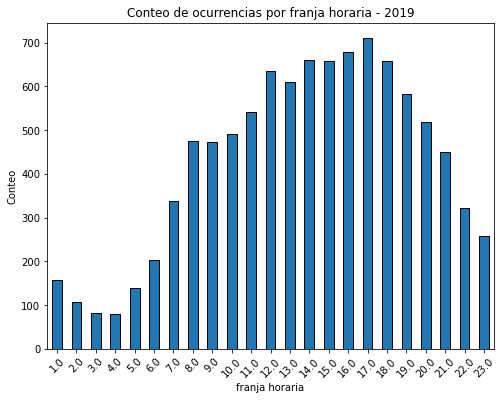

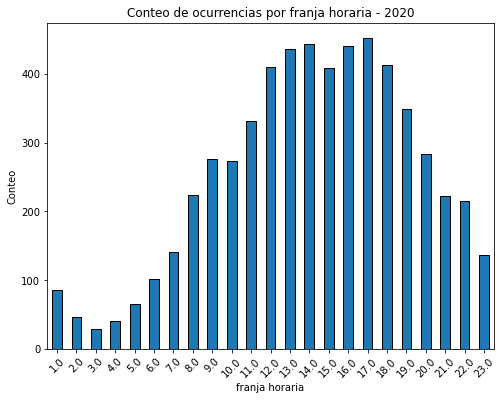

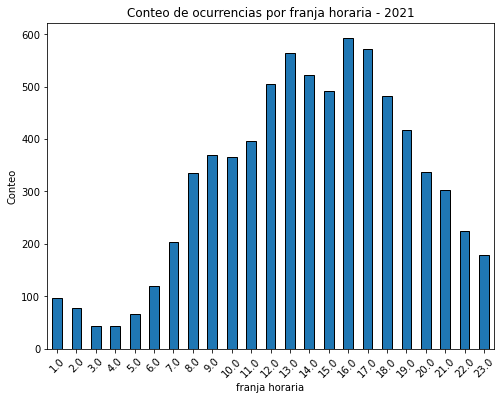

In [76]:
# List of years to create histograms
years = [2019, 2020, 2021]

# Iterate over the years
for year in years:
    # Filter out rows with 'SD' or 'sd' values in 'franja_hora' column for the current year
    filtered_df = hechos[(hechos['franja_hora'] != 0) & (hechos['aaaa'] == year)]
    
    # Count occurrences of each unique value in 'franja_hora' column
    value_counts = filtered_df['franja_hora'].value_counts().sort_index()

    # Create a bar plot to visualize the counts for the current year
    plt.figure(figsize=(8, 6))
    value_counts.plot(kind='bar', edgecolor='k')
    plt.xlabel('franja horaria')
    plt.ylabel('Conteo')
    plt.title(f'Conteo de ocurrencias por franja horaria - {year}')
    plt.xticks(rotation=45)
    plt.show()

### Observation:
The hours with the highest incidence of accidents occur in the afternoon between 1 and 5 in the afternoon, and the hours with less accidents are 3 and 4 in the morning.

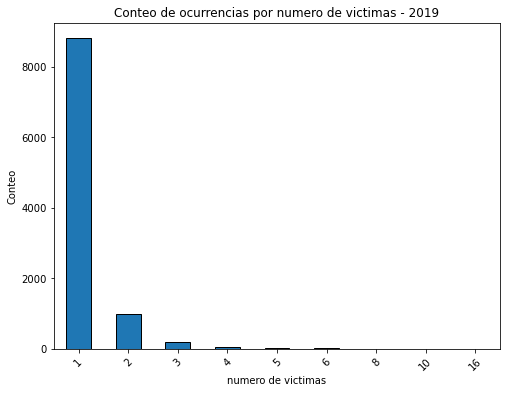

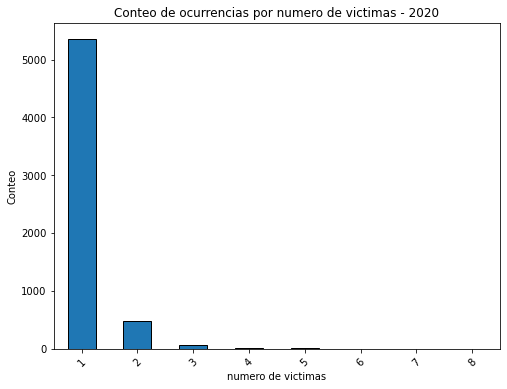

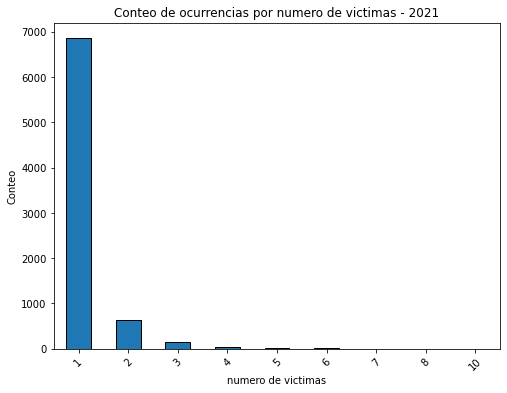

In [77]:
# List of years to create histograms
years = [2019, 2020, 2021]

# Iterate over the years
for year in years:
    # Filter out rows with 'SD' or 'sd' values in 'franja_hora' column for the current year
    filtered_df = hechos[(hechos['n_victimas'] != 0) & (hechos['aaaa'] == year)]
    
    # Count occurrences of each unique value in 'franja_hora' column
    value_counts = filtered_df['n_victimas'].value_counts().sort_index()

    # Create a bar plot to visualize the counts for the current year
    plt.figure(figsize=(8, 6))
    value_counts.plot(kind='bar', edgecolor='k')
    plt.xlabel('numero de victimas')
    plt.ylabel('Conteo')
    plt.title(f'Conteo de ocurrencias por numero de victimas - {year}')
    plt.xticks(rotation=45)
    plt.show()

### observation:
For all years most victims are only one person in each accident.

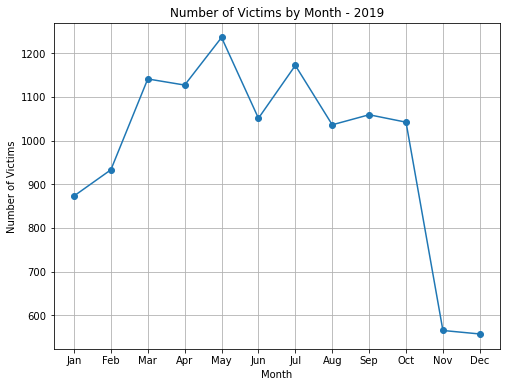

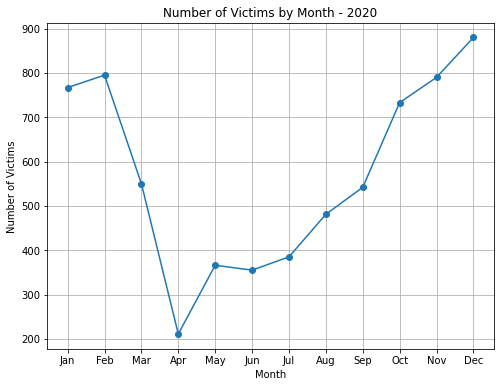

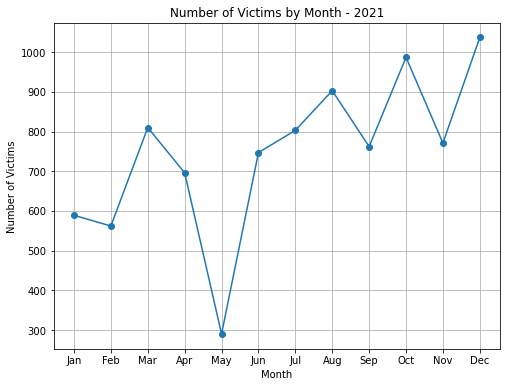

In [78]:
# Group the data by year and month and calculate the sum of victims
monthly_victims = hechos.groupby(['aaaa', 'mm'])['n_victimas'].sum().reset_index()

# Iterate over the years
years = monthly_victims['aaaa'].unique()
for year in years:
    # Filter the data for the current year
    year_data = monthly_victims[monthly_victims['aaaa'] == year]
    
    # line plot for the number of victims for each month
    plt.figure(figsize=(8, 6))
    plt.plot(year_data['mm'], year_data['n_victimas'], marker='o', linestyle='-')
    plt.xlabel('Month')
    plt.ylabel('Number of Victims')
    plt.title(f'Number of Victims by Month - {year}')
    plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.grid(True)
    plt.show()

### Observation:
In 2019, an ascending curve is observed that ends with a decrease by the end of the year, in the other 2 years the opposite is observed.

In [79]:
import plotly.graph_objects as go

filtered_df = victimas[victimas['EDAD_VICTIMA'] != 0]

# Count occurrences of each unique value in 'EDAD_VICTIMA' column
value_counts = filtered_df['EDAD_VICTIMA'].value_counts().sort_index()

# Create a line plot using Plotly
fig = go.Figure(data=go.Scatter(x=value_counts.index, y=value_counts.values, mode='lines+markers'))

# Specify axis titles within the Scatter trace
fig.update_layout(
    title='Count of occurrences by age of victims'
)

# Specify axis titles
fig.update_xaxes(title_text='Age')
fig.update_yaxes(title_text='Count')

# Show the interactive plot
fig.show()

### Observation: 
People between the ages of 22 and 30 have suffered the most accidents on average

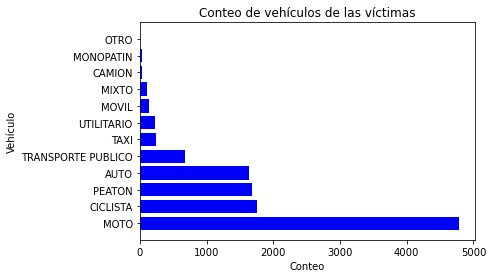

In [80]:
# Filter out rows with 'SD' or 'sd' values in 'EDAD_VICTIMA' column
filtered_df = victimas[victimas['VEHICULO_VICTIMA'] != 'SD']

# Count the occurrences of each unique age value
DF = filtered_df['VEHICULO_VICTIMA'].value_counts()

# Create a horizontal histogram
plt.barh(DF.index, DF.values, color='blue')
plt.xlabel('Conteo')
plt.ylabel('Vehículo')
plt.title('Conteo de vehículos de las víctimas')

plt.show()


### observation:
It is evident that the largest number of victims were on motorcycles. Cyclists, pedestrians, and cars very close.

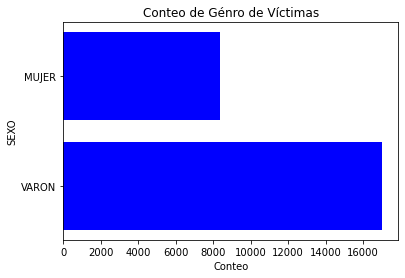

In [81]:
# Filter out rows with 'SD' or 'sd' values in 'EDAD_VICTIMA' column
filtered_df = victimas[victimas['SEXO'] != 'SD']

# Count the occurrences of each unique age value
DF = filtered_df['SEXO'].value_counts()

# Create a horizontal histogram
plt.barh(DF.index, DF.values, color='blue')
plt.xlabel('Conteo')
plt.ylabel('SEXO')
plt.title('Conteo de Génro de Víctimas')

plt.show()

### obsrvación:
Los varones son lo que han sufrido en su mayoria de un accidente, razon de uno a dos.

In [82]:
hechos.columns

Index(['id', 'n_victimas', 'aaaa', 'mm', 'dd', 'fecha', 'hora', 'franja_hora',
       'comuna', 'longitud', 'latitud', 'victima', 'acusado', 'gravedad'],
      dtype='object')

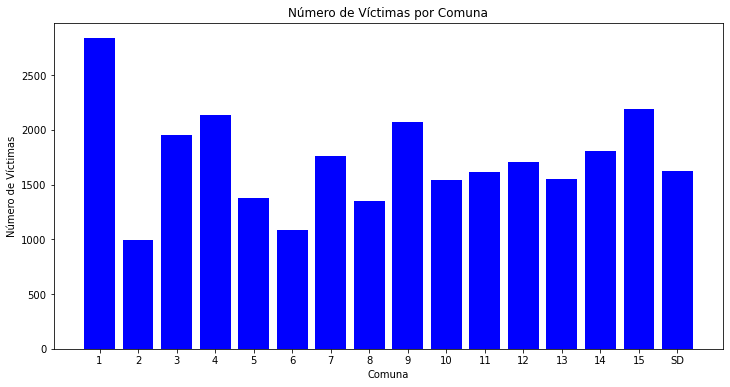

In [83]:
victimas_por_comuna = hechos.groupby('comuna')['n_victimas'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.bar(victimas_por_comuna['comuna'].astype(str), victimas_por_comuna['n_victimas'], color='blue')
plt.title('Número de Víctimas por Comuna')
plt.xlabel('Comuna')
plt.ylabel('Número de Víctimas')
plt.show()
